In [1]:
import sys, os
sys.path.append(os.environ['SNORKELHOME'] + '/tutorials/cdr')

In [2]:
import os

db = 'snorkel_good4.db'

if db:
    if db.endswith('.db'):
        os.system('cp {} snorkel.db'.format(db))
        print("Sqlite database {} copied".format(db))
    else:
        os.environ['SNORKELDB'] = 'postgres://localhost:5432/' + db
        print("Postgres database {} connected".format(db))
else:
    print("Using sqlite.db".format(db))
    
from snorkel import SnorkelSession
session = SnorkelSession()

from snorkel.models import snorkel_postgres
if not db.endswith('db') and not snorkel_postgres:
    raise Exception("Connection to PostgreSQL failed")

Sqlite database snorkel_good4.db copied


In [3]:
from snorkel.semantic import configuration

config = configuration
config['source'] = 'nl'
config['parallelism'] = 1
config['beam_width'] = 10
config['paraphrases'] = True
config['count_redundant_signatures'] = True
config['count_uniform_labels'] = True
config['majority_vote'] = True
config['model_dep'] = False
config['n_epochs'] = 50
config['n_search'] = 10

In [4]:
from snorkel.models import candidate_subclass
ChemicalDisease = candidate_subclass('ChemicalDisease', ['chemical', 'disease'])

In [5]:
from snorkel.semantic import CDRModel
sm = CDRModel(session, ChemicalDisease, config)

In [ ]:
%time sm.parse()

In [ ]:
%time sm.extract()

In [ ]:
%time sm.load_gold()

In [ ]:
%time sm.featurize()

In [6]:
%time sm.generate_lfs()

Created grammar with 321 rules
Generating LFs with beam_width=10, top_k=-1
Keeping 17 correct LFs...
Keeping 22 passing LFs...
Discarding 18 failing LFs...
Discarding 4 redundant LFs...
Using 39 LFs
CPU times: user 28.5 s, sys: 1.79 s, total: 30.3 s
Wall time: 31.1 s


In [7]:
%time sm.label()

Clearing existing...
Running UDF...
[========================================] 100%

Labeled split 0: (8272,39) sparse (nnz = 41389)
LF Summary Statistics: 39 LFs applied to 8272 candidates
------------------------------------------------------------
Coverage (candidates w/ > 0 labels):		100.00%
Overlap (candidates w/ > 1 labels):		96.55%
Conflict (candidates w/ conflicting labels):	76.43%
Redundancy (labels per candidate (avg)):	5.0
Clearing existing...
Running UDF...
[========================================] 100%

Labeled split 1: (888,39) sparse (nnz = 4287)
LF Summary Statistics: 39 LFs applied to 888 candidates
------------------------------------------------------------
Coverage (candidates w/ > 0 labels):		100.00%
Overlap (candidates w/ > 1 labels):		93.36%
Conflict (candidates w/ conflicting labels):	72.64%
Redundancy (labels per candidate (avg)):	4.8
Counted 2 LFs with redundant signatures
Counted 0 LFs with uniform labels
CPU times: user 22min 5s, sys: 27.7 s, total: 22min 3

In [8]:
%time sm.supervise()

Saved 8272 training marginals
CPU times: user 7.43 s, sys: 316 ms, total: 7.75 s
Wall time: 7.7 s


Initialized RandomSearch search of size 10. Search space size = 100.

Random Search:
[0] Testing lr = 1.00e-05, l1_penalty = 1.00e-04, l2_penalty = 1.00e-06
[SparseLR] lr=1e-05 l1=0.0001 l2=1e-06
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=2826  #epochs=50  batch size=100
[SparseLR] Epoch 0 (2.14s)	Avg. loss=0.690391	NNZ=122840
[SparseLR] Epoch 5 (12.93s)	Avg. loss=0.683046	NNZ=122840
[SparseLR] Epoch 10 (23.67s)	Avg. loss=0.675850	NNZ=122840
[SparseLR] Epoch 15 (34.55s)	Avg. loss=0.668827	NNZ=122840
[SparseLR] Epoch 20 (45.32s)	Avg. loss=0.661979	NNZ=122840
[SparseLR] Epoch 25 (56.15s)	Avg. loss=0.655300	NNZ=122840
[SparseLR] Epoch 30 (66.99s)	Avg. loss=0.648783	NNZ=122840
[SparseLR] Epoch 35 (77.83s)	Avg. loss=0.642420	NNZ=122840
[SparseLR] Epoch 40 (88.48s)	Avg. loss=0.636203	NNZ=122840
[SparseLR] Epoch 45 (99.44s)	Avg. loss=0.630125	NNZ=122840
[SparseLR] Epoch 49 (108.05s)	Avg. loss=0.625357	NNZ=122840
[SparseLR] Training done (108.05s)
P: 0.528, R: 0.2

/lfs/raiders7/ssd/bradenjh/anaconda2/envs/snorkenv/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/lfs/raiders7/ssd/bradenjh/anaconda2/envs/snorkenv/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


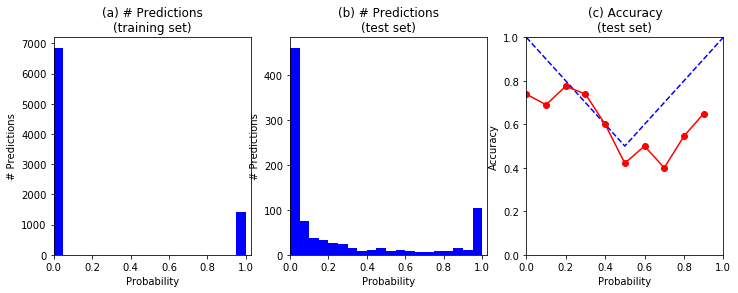

CPU times: user 27min 27s, sys: 42min 42s, total: 1h 10min 9s
Wall time: 18min 40s


In [9]:
%time sm.classify()